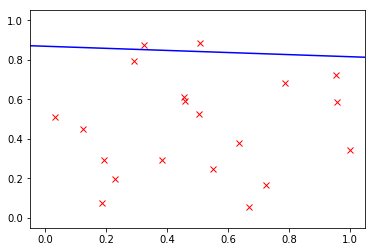

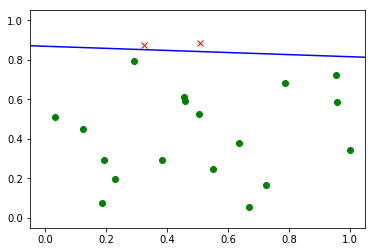

53


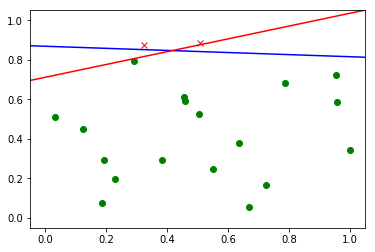

In [3]:
import random
import numpy as np
import matplotlib.pyplot as mplt
plt.rcParams['axes.unicode_minus'] = False 
%matplotlib inline
def generateRandomLine():
    line = np.random.random([2, 2])
    x1 = line[0, 0]
    y1 = line[0, 1]
    x2 = line[1, 0]
    y2 = line[1, 1]
    k = (y1 - y2) / (x1 - x2)
    b = y1 - k * x1
    # y = kx + b => -b -kx + y = 0 slope equation
    f = np.empty(3)
    f[0] = -b
    f[1] = -k
    f[2] = 1
    return f.reshape((3, 1))


def computeYOfLine(w, x):
    # w0 + w1*x + w2*y = 0
    if w[2, 0] == 0:
        return 0
    return -(w[0, 0] + w[1, 0] * x) / w[2, 0]


dataSetLimit = 20 

# generate raw data using random and plot them on graph

X = np.random.random([dataSetLimit, 2])
X = np.concatenate((np.ones([dataSetLimit, 1]), X), axis=1)

f = generateRandomLine()

mplt.plot(X[:, 1], X[:, 2], "rx")
# plot the line use x = -1, 2
xs = [-1, 2]
ys = [computeYOfLine(f, x) for x in xs]
mplt.plot(xs, ys, "b-")
mplt.xlim((-0.05, 1.05))
mplt.ylim((-0.05, 1.05))
mplt.show()



# classify data

y = np.matmul(X, f)
# we must use a one dimension array to index X
greatest = (y >= 0).reshape(dataSetLimit) 
least = X[~greatest]
greatest = X[greatest]

mplt.plot(greatest[:, 1], greatest[:, 2], 'rx')
mplt.plot(least[:, 1], least[:, 2], 'go')
mplt.plot(xs, ys, "b-")
mplt.xlim((-0.05, 1.05))
mplt.ylim((-0.05, 1.05))
mplt.show()

for i in range(dataSetLimit):
    if y[i] < 0:
        y[i] = -1
    else:
        y[i] = 1

# run a perceptron learning algorithm
count=0
weight = np.empty((3, 1))
while True:
    flag = True
    for i in range(dataSetLimit):
        x = X[i]
        h = 1
        if np.matmul(x, weight) < 0:
            h = -1
        if h != y[i]:
            weight += (y[i] * x).reshape((3, 1))
            flag = False
    if flag:
        break
    count+=1
print(count)
#

mplt.plot(greatest[:, 1], greatest[:, 2], 'rx')
mplt.plot(least[:, 1], least[:, 2], 'go')
mplt.plot(xs, ys, "b-")
ys = [computeYOfLine(weight, x) for x in xs]
mplt.plot(xs, ys, "r-")
mplt.xlim((-0.05, 1.05))
mplt.ylim((-0.05, 1.05))
mplt.show()

In [4]:
import sys
print(sys.executable)

c:\users\sony\appdata\local\programs\python\python37\python.exe
